# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [82]:
# Your code here
import pandas as pd

In [83]:
data = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv')
data.columns

Index(['Customer', 'ST', 'GENDER', 'Education', 'Customer Lifetime Value',
       'Income', 'Monthly Premium Auto', 'Number of Open Complaints',
       'Policy Type', 'Vehicle Class', 'Total Claim Amount'],
      dtype='object')

In [84]:
# Step 1: Convert column names to lowercase
data.columns = data.columns.str.lower()

# Step 2: Replace white spaces in column names with underscores
data.columns = data.columns.str.replace(' ', '_')

# Step 3: Replace "st" with "state" in column names
data.columns = data.columns.str.replace('st', 'state')

# Display the modified column names
print(data.columns)

Index(['custateomer', 'state', 'gender', 'education',
       'custateomer_lifetime_value', 'income', 'monthly_premium_auto',
       'number_of_open_complaints', 'policy_type', 'vehicle_class',
       'total_claim_amount'],
      dtype='object')


## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [85]:
# Your code here
gender_mapping = {
    "F": "F",
    "M": "M",
    "Femal": "F",
    "Male": "M",
    "female": "F"
}

# Replace the values in the "Gender" column using the mapping
data['gender'] = data['gender'].replace(gender_mapping)

# Verify the changes
print(data['gender'].value_counts())

F    502
M    452
Name: gender, dtype: int64


In [86]:
# Step 2: Clean State Column
state_mapping = {
    'AZ': 'Arizona',
    'Cali': 'California',
    'WA': 'Washington'
}
data['state'] = data['state'].replace(state_mapping)

# Verify the changes
print(data['state'].value_counts())

California    331
Oregon        320
Arizona       211
Washington    111
Nevada         98
Name: state, dtype: int64


In [87]:
# Step 3: Clean Education Column
data['education'] = data['education'].replace({'Bachelors': 'Bachelor'})

# Verify the changes
print(data['education'].value_counts())

Bachelor                331
College                 313
High School or Below    296
Master                   94
Doctor                   37
Name: education, dtype: int64


In [88]:
data.head()

,custateomer,state,gender,education,custateomer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [89]:
# Step 4: Clean Customer Lifetime Value Column
data['custateomer_lifetime_value'] = data['custateomer_lifetime_value'].str.rstrip('%').astype(float)

# Verify the changes
data['custateomer_lifetime_value']

0              NaN
1        697953.59
2       1288743.17
3        764586.18
4        536307.65
           ...    
4003           NaN
4004           NaN
4005           NaN
4006           NaN
4007           NaN
Name: custateomer_lifetime_value, Length: 4008, dtype: float64

In [90]:
state_mapping = {
    'AZ': 'Arizona',
    'Cali': 'California',
    'WA': 'Washington'
}
data['state'] = data['state'].replace(state_mapping)

# Verify the changes
print(data['state'].value_counts())

California    331
Oregon        320
Arizona       211
Washington    111
Nevada         98
Name: state, dtype: int64


In [91]:
# Step 5: Clean Vehicle Class Column
vehicle_class_mapping = {
    'Sports Car': 'Luxury',
    'Luxury SUV': 'Luxury',
    'Luxury Car': 'Luxury'
}

data['vehicle_class'] = data['vehicle_class'].replace(vehicle_class_mapping)
'vehicle_class'

#data['vehicle_class']
print(data['vehicle_class'].value_counts(dropna=False))

NaN              2937
Four-Door Car     576
Two-Door Car      205
SUV               199
Luxury             91
Name: vehicle_class, dtype: int64


In [92]:
# Display the cleaned dataframe
data.head()

,custateomer,state,gender,education,custateomer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [93]:
# Your code here
# Correct the column name to 'Customer Lifetime Value' (assuming this is the actual column name)
data['custateomer_lifetime_value'] = pd.to_numeric(data['custateomer_lifetime_value'], errors='coerce')

In [94]:
data['custateomer_lifetime_value'].dtypes

dtype('float64')

In [95]:
#step 2 Number of open complaints has an incorrect format. 
# Look at the different values it takes with unique() and take the middle value.
data['number_of_open_complaints'].unique()

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan],
      dtype=object)

In [96]:
# As an example, 1/5/00 should be 5.
string = '1/5/00'
string.split('/')

['1', '5', '00']

In [97]:
# Number of open complaints is a string - remember you can use split() to deal with it and take the number you need.
# Finally, since it should be numeric, cast the column to be in its proper type
# Split the 'number_of_open_complaints' column by '/'
data['number_of_open_complaints'] = data['number_of_open_complaints'].str.split('/').str[1]

# Convert the extracted portion to numeric (assuming it contains numeric values)
data['number_of_open_complaints'] = pd.to_numeric(data['number_of_open_complaints'], errors='coerce')

In [130]:
data['number_of_open_complaints'].unique()

array([ 0.,  2.,  1.,  3.,  5.,  4., nan])

In [ ]:
data[''] = data['x'].astype(float, errors='coerce')

In [103]:
data.head()

,custateomer,state,gender,education,custateomer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323


## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers using `applymap()`.

In [163]:
# Identify any columns with null or missing values.
# Identify how many null values each column has.
# You can use the isnull() function in pandas to find columns with null values.

columns_with_null_values = data.columns[data.isna().any()].tolist()
print("Columns with null values:")
print(columns_with_null_values)

Columns with null values:
['custateomer_lifetime_value', 'income', 'monthly_premium_auto', 'number_of_open_complaints', 'total_claim_amount']


In [180]:
# custateomer_lifetime_value
mean_value = data['custateomer_lifetime_value'].mean()
data['custateomer_lifetime_value'].fillna(mean_value, inplace=True)

In [181]:
# income
mean_value = data['income'].mean()
data['income'].fillna(mean_value, inplace=True)

In [182]:
# monthly_premium_auto
mean_value = data['monthly_premium_auto'].mean()
data['monthly_premium_auto'].fillna(mean_value, inplace=True)

In [183]:
# number_of_open_complaints
mean_value = data['number_of_open_complaints'].mean()
data['number_of_open_complaints'].fillna(mean_value, inplace=True)

In [184]:
# total_claim_amount
mean_value = data['total_claim_amount'].mean()
data['total_claim_amount'].fillna(mean_value, inplace=True)

In [186]:
null_mask = data.isna()  # Creates a DataFrame of boolean values
null_count = null_mask.sum()  # Counts null values in each column
print(null_count)

custateomer                   0
state                         0
gender                        0
education                     0
custateomer_lifetime_value    0
income                        0
monthly_premium_auto          0
number_of_open_complaints     0
policy_type                   0
vehicle_class                 0
total_claim_amount            0
dtype: int64


In [201]:
# After formatting data types, as a last step, convert all the numeric variables to integers using applymap()
def convert_to_integer(x):
    try:
        return int(x)
    except (ValueError, TypeError):
        return x
data = data.applymap(convert_to_integer)
data.dtypes

custateomer                   object
state                         object
gender                        object
education                     object
custateomer_lifetime_value     int64
income                         int64
monthly_premium_auto           int64
number_of_open_complaints      int64
policy_type                   object
vehicle_class                 object
total_claim_amount             int64
dtype: object

## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [204]:
# Your code here
duplicate_rows = data.duplicated()
print(duplicate_rows)

0       False
1       False
2       False
3       False
4       False
        ...  
4003     True
4004     True
4005     True
4006     True
4007     True
Length: 4008, dtype: bool


In [207]:
# Drop all duplicate rows and keep the first occurrence
data = data.drop_duplicates()
print(data.shape)

(1072, 11)


In [208]:
data.to_csv('cleaned_data.csv', index=False)
print(data.to_csv)

<bound method NDFrame.to_csv of      custateomer       state gender             education  \
0        RB50392  Washington      F                Master   
1        QZ44356     Arizona      F              Bachelor   
2        AI49188      Nevada      F              Bachelor   
3        WW63253  California      M              Bachelor   
4        GA49547  Washington      M  High School or Below   
...          ...         ...    ...                   ...   
1067     VJ51327  California      F  High School or Below   
1068     GS98873     Arizona      F              Bachelor   
1069     CW49887  California      F                Master   
1070     MY31220  California      F               College   
1071     AA71604  California      F              Bachelor   

      custateomer_lifetime_value  income  monthly_premium_auto  \
0                         793690       0                  1000   
1                         697953       0                    94   
2                        1288743   48

# lab | customer-analysis-round-3

Show DataFrame info.
Describe DataFrame.
Show a plot of the Gender breakdown.
Show a plot of Income by State.
Show a plot of the Policy Type by the Total Claim Amount.
Show a plot of the Education by Vehicle Class.
What insights can you establish from these plots?
What other plots do you feel would be beneficial?

In [108]:
# Show DataFrame info.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   custateomer                 1071 non-null   object 
 1   state                       1071 non-null   object 
 2   gender                      954 non-null    object 
 3   education                   1071 non-null   object 
 4   custateomer_lifetime_value  1068 non-null   float64
 5   income                      1071 non-null   float64
 6   monthly_premium_auto        1071 non-null   float64
 7   number_of_open_complaints   1071 non-null   float64
 8   policy_type                 1071 non-null   object 
 9   vehicle_class               1071 non-null   object 
 10  total_claim_amount          1071 non-null   float64
dtypes: float64(5), object(6)
memory usage: 344.6+ KB


In [109]:
# Describe DataFrame.
data.describe()

,custateomer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
count,1.068000e+03,1071.000000,1071.000000,1071.000000,1071.000000
mean,7.936903e+05,39295.701214,193.234360,0.394024,404.986909
std,6.434784e+05,30469.427060,1601.190369,0.883769,293.027260
min,2.004351e+05,0.000000,61.000000,0.000000,0.382107
25%,4.034080e+05,14072.000000,68.000000,0.000000,202.157702
50%,5.881742e+05,36234.000000,83.000000,0.000000,354.729129
75%,8.962872e+05,64631.000000,109.500000,0.000000,532.800000
max,5.816655e+06,99960.000000,35354.000000,5.000000,2893.239678


In [116]:
# Show a plot of the Gender breakdown.
import matplotlib.pyplot as plt
import seaborn as sns 

In [114]:
print(data.columns)

Index(['custateomer', 'state', 'gender', 'education',
       'custateomer_lifetime_value', 'income', 'monthly_premium_auto',
       'number_of_open_complaints', 'policy_type', 'vehicle_class',
       'total_claim_amount'],
      dtype='object')


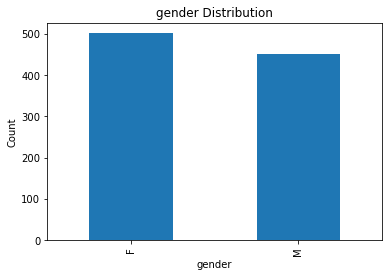

In [115]:
gender_counts = data['gender'].value_counts()
gender_counts.plot(kind='bar')
plt.title('gender Distribution')
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()

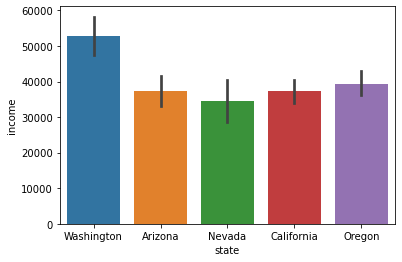

In [120]:
# Show a plot of Income by State.
sns.barplot(x="state", y="income", data=data)
plt.show()

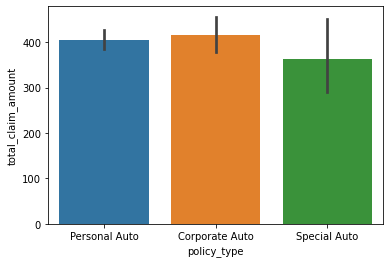

In [122]:
# Show a plot of the Policy Type by the Total Claim Amount.
sns.barplot(x="policy_type", y="total_claim_amount", data=data)
plt.show()

In [124]:
print(data.columns)

Index(['custateomer', 'state', 'gender', 'education',
       'custateomer_lifetime_value', 'income', 'monthly_premium_auto',
       'number_of_open_complaints', 'policy_type', 'vehicle_class',
       'total_claim_amount'],
      dtype='object')


In [132]:
data['education'].unique()

array(['Master', 'Bachelor', 'High School or Below', 'College', 'Doctor',
       nan], dtype=object)

In [134]:
data['vehicle_class'].unique()

array(['Four-Door Car', 'Two-Door Car', 'SUV', 'Luxury', nan],
      dtype=object)

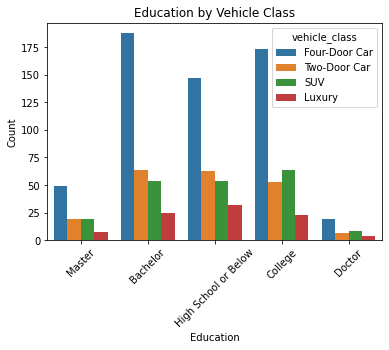

In [138]:
# Show a plot of the Education by Vehicle Class. 
sns.countplot(x='education', hue='vehicle_class', data=data)

# Set labels and title
plt.xlabel("Education")
plt.ylabel("Count")
plt.title("Education by Vehicle Class")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

### What insights can you establish from these plots? What other plots do you feel would be beneficial?
* Clients are more female than male
* Washington customers have the highest incomes 
* Personal and corporate auto policies have more claims than specialty auto policies.
* Education does not seem to affect the vehicle class of customers.

# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [ ]:
# Your code here

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [ ]:
# Your code here